In [80]:
lines = '''2199943210
3987894921
9856789892
8767896789
9899965678'''.split('\n')

In [115]:
f=open('./input.txt','r')
lines = f.read().split('\n')[:-1]

In [142]:
import numpy as np
rows=[]
for line in lines:
    cols = list(map(int,line))
    rows.append(cols)
    
grid = np.pad(rows,1,mode='constant',constant_values=9)

In [143]:
score = 0
lowpoints = []
for y in range(1,len(grid)-1):
    for x in range(1,len(grid[0])-1):
        if (grid[y,x] < grid[y-1,x]) & (grid[y,x] < grid[y+1,x]) &(grid[y,x] < grid[y,x-1]) & (grid[y,x] < grid[y,x+1]):
            #print(grid[y,x])
            score+=grid[y,x]+1
            lowpoints.append([y,x])
score

560

In [144]:
#find the basin area

#bound by 9, sounds like a flood fill

In [145]:
from skimage.segmentation import flood, flood_fill
for lowpoint in lowpoints:
    filled_area = flood_fill(grid<9, tuple(lowpoint), 2,)
    break

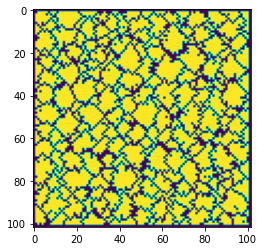

In [146]:
import matplotlib.pyplot as plt
plt.imshow(filled_area)

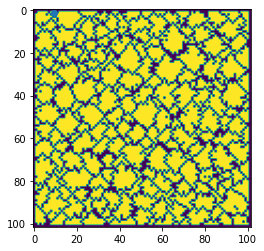

In [147]:
from scipy import ndimage as ndi
labels,count = ndi.label(grid<9)

plt.imshow(grid<9)
plt.scatter(y=lowpoint[0],x=lowpoint[1])

In [148]:
labels

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,  15,  15,   0],
       [  0,   1,   1, ...,  15,  15,   0],
       ...,
       [  0, 221, 221, ..., 232,   0,   0],
       [  0,   0, 221, ..., 232, 232,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [149]:
import pandas as pd
tally = []
for i in range(1,len(labels)+1):
    tally.append((labels==i).sum())
    if (labels==i).sum() == 97:
        print(i)
np.product(sorted(tally)[-3:])


29


939154

In [150]:
sorted(tally)[-4:]

[91, 94, 97, 103]

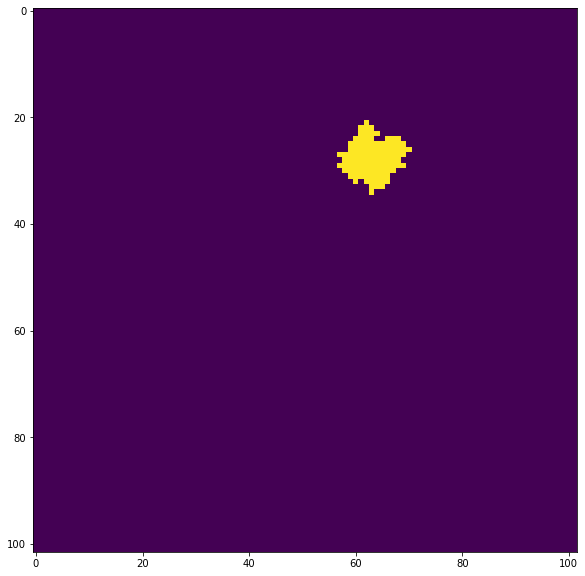

In [151]:
plt.figure(figsize=(10,10))
#51,29,68
plt.imshow(labels==68)

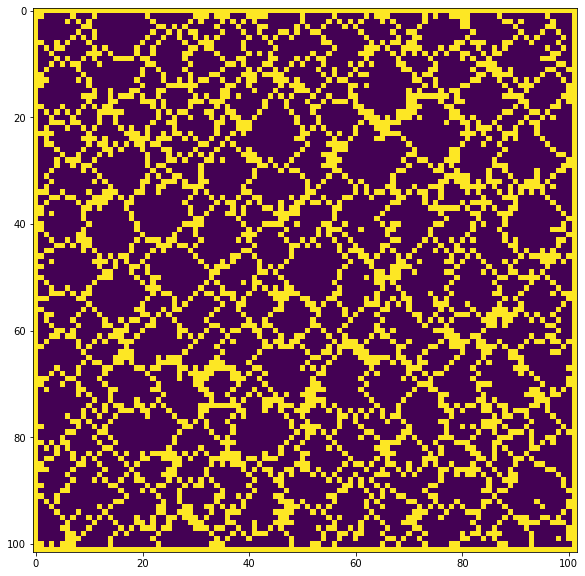

In [152]:
plt.figure(figsize=(10,10))
plt.imshow(grid>=9)